In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostrar código."></form>''')

BOLETIM EPIDEMIOLóGICO DA MICRORREGIÂO DE OURO PRETO

In [1]:
import pandas as pd
import numpy as np

base = pd.read_csv('notificacoes-covid19-mg(43).csv',sep=';', encoding='latin-1')
base['contador'] = 1

In [2]:
select_OP = base.loc[base['MUNICIPIO_RESIDENCIA'] == 'OURO PRETO']
select_Mariana = base.loc[base['MUNICIPIO_RESIDENCIA'] == 'MARIANA']
select_Itabirito = base.loc[base['MUNICIPIO_RESIDENCIA'] == 'ITABIRITO']
select_Diogo_de_vasconcelos = base.loc[base['MUNICIPIO_RESIDENCIA'] == 'DIOGO DE VASCONCELOS']
Microregiao_OP = pd.concat([select_OP, select_Mariana, select_Itabirito, select_Diogo_de_vasconcelos])

In [3]:
Casos_confirmados = Microregiao_OP.shape[0]
print('Casos confirmados: ', Casos_confirmados)

Casos confirmados:  1025


In [4]:
em_acompanhamento = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'EM ACOMPANHAMENTO']
Casos_acompanhamento = em_acompanhamento['contador'].sum()
print('Casos em acompanhamento: ', Casos_acompanhamento)

Casos em acompanhamento:  390


In [19]:
recuperados = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'RECUPERADO']
Casos_recuperados = recuperados['contador'].sum()
print('Casos recuperados: ', Casos_recuperados)

Casos recuperados:  623


In [12]:
obitos = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos['contador'].sum()
print('Óbitos: ', obitos_OP)

Óbitos:  12


In [13]:
print('')

1_ PERFIL EPIDEMIOLOGICO DOS CONFIRMADOS:

POR SEXO:

In [14]:
Homens_confirmados = Microregiao_OP.loc[Microregiao_OP['SEXO'] == 'Masculino']
Homens_confirmados_vivos = Homens_confirmados[Homens_confirmados.EVOLUCAO != 'OBITO']
Homens_confirmados_vivos = Homens_confirmados_vivos['contador'].sum()
print('Homens confirmados: ', Homens_confirmados_vivos)

Homens confirmados:  722


In [9]:
Mulheres_confirmadas = Microregiao_OP.loc[Microregiao_OP['SEXO'] == 'Feminino']
Mulheres_confirmadas_vivas = Mulheres_confirmadas[Mulheres_confirmadas.EVOLUCAO != 'OBITO']
Mulheres_confirmadas_vivas = Mulheres_confirmadas_vivas['contador'].sum()
print('Mulheres confirmadas: ', Mulheres_confirmadas_vivas)

Mulheres confirmadas:  291


In [10]:
perct_por_sexo_H_vivos = Homens_confirmados_vivos/(Homens_confirmados_vivos+Mulheres_confirmadas_vivas)
print("Porcentagem homens: ","{:.0%}".format(perct_por_sexo_H_vivos));

Porcentagem homens:  71%


In [11]:
perct_por_sexo_M_vivos = Mulheres_confirmadas_vivas/(Homens_confirmados_vivos+Mulheres_confirmadas_vivas)
print("Porcentagem mulheres: ","{:.0%}".format(perct_por_sexo_M_vivos));

Porcentagem mulheres:  29%


In [12]:
N_vivo = Mulheres_confirmadas_vivas + Homens_confirmados_vivos
print("N total: ",N_vivo)

N total:  1013


In [13]:
print('')

COMORBIDADE:

In [14]:
com_comorbidade = Microregiao_OP.loc[Microregiao_OP['COMORBIDADE'] == 'SIM']
Com_comorbidade_vivos = com_comorbidade[com_comorbidade.EVOLUCAO != 'OBITO']
Com_comorbidade_vivos = Com_comorbidade_vivos['contador'].sum()
print("Com comorbidade: ", Com_comorbidade_vivos)

Com comorbidade:  27


In [15]:
sem_comorbidade = Microregiao_OP.loc[Microregiao_OP['COMORBIDADE'] == 'NÃO']
Sem_comorbidade_vivos = sem_comorbidade[sem_comorbidade.EVOLUCAO != 'OBITO']
Sem_comorbidade_vivos = Sem_comorbidade_vivos['contador'].sum() 
print ("Sem comorbidade: ", Sem_comorbidade_vivos)

Sem comorbidade:  13


In [16]:
comorbidade_nao_informada = Microregiao_OP.loc[Microregiao_OP['COMORBIDADE'] == 'Não Informado']
Comorbidade_nao_informada = comorbidade_nao_informada['contador'].sum()
print("Comorbidade não informada: ",Comorbidade_nao_informada)

Comorbidade não informada:  973


In [17]:
print('')

In [18]:
Media_idade_confirmados = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] != 'OBITO']
Media_idade_confirmados = Media_idade_confirmados['IDADE'].mean()
print ("Média de idade entre os vivos: ", round(Media_idade_confirmados))

Média de idade entre os vivos:  41


In [19]:
Microregiao_OP['FAIXA_ETARIA'] = Microregiao_OP['FAIXA_ETARIA'].replace(['60 a 69 anos', '70 a 79 anos', '80 a 89 anos', '90 ou mais'], '>= 60 anos')

grafico_faixa_etaria = Microregiao_OP.groupby(['FAIXA_ETARIA']).contador.sum()
grafico_faixa_etaria = pd.DataFrame({'quantidade': grafico_faixa_etaria}).reset_index()
grafico_faixa_etaria

,FAIXA_ETARIA,quantidade
0,0 a 9 anos,10
1,10 a 19 anos,16
2,20 a 29 anos,115
3,30 a 39 anos,325
4,40 a 49 anos,227
5,50 a 59 anos,110
6,>= 60 anos,100


In [20]:
denominador_20_59 = grafico_faixa_etaria['quantidade'].sum()
numerador_20_59 = grafico_faixa_etaria.iloc[[2,3,4,5],1].sum(axis=0)

percent_entre_20_59 = (numerador_20_59/denominador_20_59)
print("Porcentagem de confirmados entre 20 e 59 anos: ","{:.0%}".format(percent_entre_20_59));

Porcentagem de confirmados entre 20 e 59 anos:  86%


In [21]:
print('')

2_ PERFIL EPIDEMIOLOGICO DOS OBITOS

POR SEXO:

In [22]:
Homens_mortos = Microregiao_OP.loc[Microregiao_OP['SEXO'] == 'Masculino']
Homens_mortos = Homens_mortos.loc[Homens_mortos['EVOLUCAO'] == 'OBITO']
Homens_mortos = Homens_mortos['contador'].sum()
print("Homens mortos: ", Homens_mortos)

Homens mortos:  8


In [23]:
Mulheres_mortas = Microregiao_OP.loc[Microregiao_OP['SEXO'] == 'Feminino']
Mulheres_mortas = Mulheres_mortas.loc[Mulheres_mortas['EVOLUCAO'] == 'OBITO']
Mulheres_mortas = Mulheres_mortas['contador'].sum()
print("Mulheres mortas: ", Mulheres_mortas)

Mulheres mortas:  4


In [24]:
perct_por_sexo_H_mortos = Homens_mortos/(Homens_mortos+Mulheres_mortas)
print("Procentagem de homens mortos: ","{:.0%}".format(perct_por_sexo_H_mortos));

Procentagem de homens mortos:  67%


In [25]:
perct_por_sexo_M_mortos = Mulheres_mortas/(Homens_mortos+Mulheres_mortas)
print("Porcentagem de mulheres mortas: ","{:.0%}".format(perct_por_sexo_M_mortos));

Porcentagem de mulheres mortas:  33%


In [26]:
print("N total: ",Homens_mortos+Mulheres_mortas)

N total:  12


In [27]:
Letalidade = obitos_OP/Casos_confirmados
print("Letalidade: ","{:.2%}".format(Letalidade));

Letalidade:  1.17%


In [28]:
Media_idade_obitos = obitos['IDADE'].mean()
print("Media de idade dos óbitos: ",round(Media_idade_obitos))

Media de idade dos óbitos:  60


In [29]:
print('')

Tabela Obitos por idade:

In [30]:
grafico_faixa_etaria_mortos = obitos.groupby(['FAIXA_ETARIA']).contador.sum()
grafico_faixa_etaria_mortos = pd.DataFrame({'Óbitos': grafico_faixa_etaria_mortos}).reset_index()
df = pd.DataFrame({"FAIXA_ETARIA":["20 a 29 anos"],"Óbitos":[0]})
grafico_faixa_etaria_mortos = df.append(grafico_faixa_etaria_mortos, ignore_index = True) 
grafico_faixa_etaria_mortos

,FAIXA_ETARIA,Óbitos
0,20 a 29 anos,0
1,30 a 39 anos,1
2,40 a 49 anos,3
3,50 a 59 anos,1
4,60 a 69 anos,3
5,70 a 79 anos,2
6,80 a 89 anos,2


In [31]:
obitos60 = grafico_faixa_etaria_mortos.iloc[[4,5,6],1].sum(axis=0)
percent_obitos_60 = (obitos60/obitos_OP)
print("Obitos acima de 60 anos: ","{:.0%}".format(percent_obitos_60));

Obitos acima de 60 anos:  58%


In [32]:
print('')

3_ DADOS HOSPITALARES:

In [33]:
internados = Microregiao_OP.loc[Microregiao_OP['INTERNACAO'] == 'SIM']
internados = internados['contador'].sum()
print("Internados: ", internados)

Internados:  24


In [34]:
print('')

5_ DISTRIBUIÇÃO DOS CASOS

In [35]:
confirmados_sem_obito = Microregiao_OP.loc[Microregiao_OP['EVOLUCAO'] != 'OBITO']
confirmados_sem_obito = confirmados_sem_obito['contador'].sum()
print("Casos sem obito:", confirmados_sem_obito)

Casos sem obito: 1013


In [36]:
print("Obitos: ",obitos['contador'].sum())

Obitos:  12


In [37]:
print("Casos confirmados totais: ",Casos_confirmados)

Casos confirmados totais:  1025


In [38]:
pd.set_option('display.max_rows', None)
lista_confirmados = Microregiao_OP.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()

obitos_OP = Microregiao_OP.loc[base['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos_OP.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()

lista_confirmados = pd.DataFrame({"confirmados": lista_confirmados}).reset_index()
obitos_OP = pd.DataFrame({'obitos': obitos_OP}).reset_index()
tabela2 = lista_confirmados.join(obitos_OP.set_index('MUNICIPIO_RESIDENCIA'), on = 'MUNICIPIO_RESIDENCIA')
tabela2 = tabela2.fillna(0)

In [39]:
print('')

Cidades:

In [40]:
print(*list(tabela2['MUNICIPIO_RESIDENCIA']), sep= '\n')

DIOGO DE VASCONCELOS
ITABIRITO
MARIANA
OURO PRETO


In [41]:
print(' ')

Numero de confirmados por cidade:

In [42]:
print(*list(tabela2['confirmados']), sep='\n')

6
331
534
154


In [43]:
print(' ')

Número de óbitos por cidade:

In [44]:
[print(int(tabela2['obitos'].values[i])) for i in range(len(tabela2['obitos'].values))]
#print(*list(tabela2['obitos']), sep='\n')

0
1
9
2


[None, None, None, None]

6. GRAFICOS DE COMPORTAMENTO DO COVID-19

Geração da Tabela de confirmados diarios e eacumulados:

In [48]:
Microregiao_OP

,Unnamed: 0,ID,CONTADOR,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO,contador
4665,4666,4796,300962,16/05/2020,Caso Confirmado,Masculino,46.0,40 a 49 anos,314610.0,OURO PRETO,SIM,OBITO,NÃO INFORMADO,NÃO INFORMADO,25/06/2020,1
7108,7109,8251,303405,25/05/2020,Caso Confirmado,Masculino,41.0,40 a 49 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO INFORMADO,NÃO INFORMADO,25/06/2020,1
7954,7955,9124,304251,26/05/2020,Caso Confirmado,Masculino,36.0,30 a 39 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020,1
7963,7964,9133,304260,26/05/2020,Caso Confirmado,Masculino,29.0,20 a 29 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020,1
9233,9234,10429,305530,29/05/2020,Caso Confirmado,Feminino,38.0,30 a 39 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020,1
9234,9235,10430,305531,29/05/2020,Caso Confirmado,Feminino,38.0,30 a 39 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO INFORMADO,NÃO INFORMADO,25/06/2020,1
9235,9236,10431,305532,29/05/2020,Caso Confirmado,Feminino,7.0,0 a 9 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO INFORMADO,NÃO INFORMADO,25/06/2020,1
9236,9237,10432,305533,29/05/2020,Caso Confirmado,Feminino,25.0,20 a 29 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020,1
9237,9238,10433,305534,29/05/2020,Caso Confirmado,Feminino,36.0,30 a 39 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO INFORMADO,NÃO INFORMADO,25/06/2020,1
9238,9239,10434,305535,29/05/2020,Caso Confirmado,Feminino,44.0,40 a 49 anos,314610.0,OURO PRETO,Não Informado,RECUPERADO,NÃO INFORMADO,NÃO INFORMADO,25/06/2020,1


In [54]:
confirmados_OP = Microregiao_OP.groupby(['DATA_NOTIFICACAO']).contador.sum()

obitos_OP = Microregiao_OP.loc[base['EVOLUCAO'] == 'OBITO']
obitos_OP = obitos_OP.groupby(['DATA_NOTIFICACAO']).contador.sum()

tabelac = pd.DataFrame({"confirmados_diarios": confirmados_OP}).reset_index()
tabelao = pd.DataFrame({'obitos_diarios': obitos_OP}).reset_index()
tabela = tabelac.join(tabelao.set_index('DATA_NOTIFICACAO'), on = 'DATA_NOTIFICACAO')
tabela = tabela.fillna(0)

from datetime import datetime
#transformar variavel str em date
tabela['DATA_NOTIFICACAO'] = [datetime.strptime(i, '%d/%m/%Y').date() for i in list(tabela['DATA_NOTIFICACAO'])]

data = pd.date_range(start='3/20/2020', end='6/25/2020')
data = data.astype('datetime64[ns]')
data = pd.DataFrame(data)

tabela['DATA_NOTIFICACAO'] = tabela['DATA_NOTIFICACAO'].astype('datetime64[ns]')
tabela = tabela.merge(data, how = 'right', left_on='DATA_NOTIFICACAO', right_on=data[0])
tabela = tabela.fillna(0)
tabela.sort_values('DATA_NOTIFICACAO', inplace=True)

tabela['confirmados_totais'] = np.cumsum(tabela['confirmados_diarios'])
tabela['obitos_totais'] = np.cumsum(tabela['obitos_diarios'])
tabela = tabela.rename(columns={'DATA_NOTIFICACAO': 'data'})
tabela.drop(tabela.columns[3], axis=1, inplace=True)
tabela['letalidade'] = tabela['obitos_totais']/tabela['confirmados_totais']
tabela['index_data'] = [x for x in range(98)]

In [55]:
tabela.tail()

,data,confirmados_diarios,obitos_diarios,confirmados_totais,obitos_totais,letalidade,index_data
35,2020-06-20,1.0,0.0,926.0,12.0,0.012959,92
38,2020-06-21,9.0,0.0,935.0,12.0,0.012834,93
40,2020-06-22,38.0,0.0,973.0,12.0,0.012333,94
44,2020-06-23,14.0,0.0,987.0,12.0,0.012158,95
46,2020-06-24,38.0,0.0,1025.0,12.0,0.011707,96


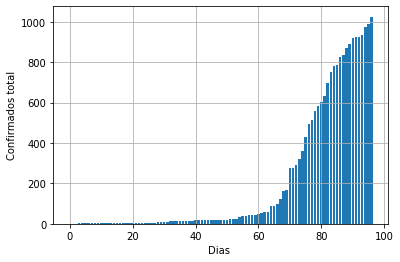

In [65]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,6].values, tabela.iloc[:,3].values)
plt.xlabel('Dias ')
plt.ylabel('Confirmados total')
plt.grid(True)

Grafico mortes totais:


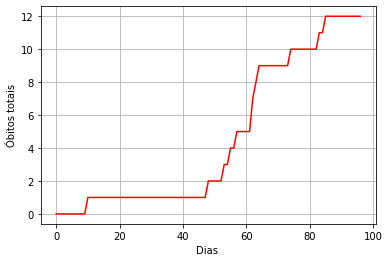

In [57]:
import matplotlib.pyplot as plt
plt.plot(tabela.iloc[:,6].values, tabela.iloc[:,4].values, color = "red")
plt.xlabel('Dias ')
plt.ylabel('Óbitos totais')
plt.grid(True)

Grafico confirmados diarios Micro OP:

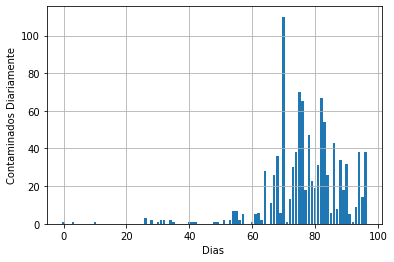

In [58]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,6].values, tabela.iloc[:,1].values)
plt.xlabel('Dias ')
plt.ylabel('Contaminados Diariamente')
plt.grid(True)

Grafico mortes diarias Micro OP:

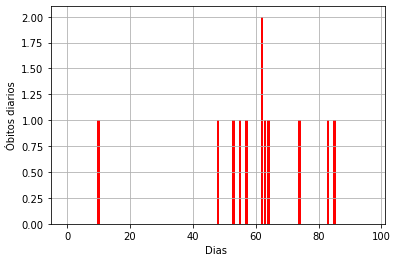

In [59]:
import matplotlib.pyplot as plt
plt.bar(tabela.iloc[:,6].values, tabela.iloc[:,2].values, color = "red")
plt.xlabel('Dias ')
plt.ylabel('Óbitos diarios')
plt.grid(True)

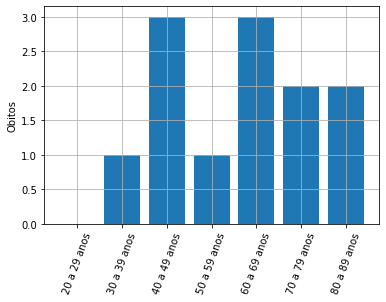

In [60]:
import matplotlib.pyplot as plt
plt.bar(grafico_faixa_etaria_mortos.iloc[:,0].values, grafico_faixa_etaria_mortos.iloc[:,1].values)
plt.ylabel('Obitos')
plt.xticks(np.arange(0, 7), rotation=70)
plt.grid(True)

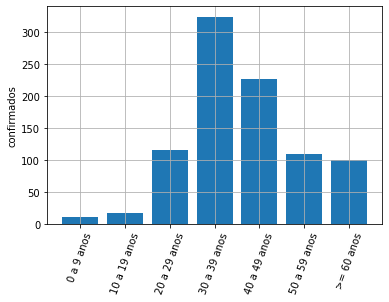

In [61]:
import matplotlib.pyplot as plt
plt.bar(grafico_faixa_etaria.iloc[:,0].values, grafico_faixa_etaria.iloc[:,1].values)
plt.ylabel('confirmados')
plt.xticks(np.arange(0, 7), rotation=70)
plt.grid(True)

In [63]:
tabela.to_csv("tabela_micro_OP.csv", index = False)